In [1]:
from problems.waveguide import Waveguide
# from problems.waveguide.geometries import CleanWaveGuide2
from problems.waveguide.exact_solutions import Mode
import numpy as np
from trefftz.dg.functions import ComplexFunction

In [ ]:
waveguide = Waveguide.CreateClean(verbose=True, R=2, lc = 0.05)

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 60%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000546226s, CPU 0.001316s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.224088s, CPU 0.22263s)
Info    : 4910 nodes 9822 elements
Problem ready for assembly


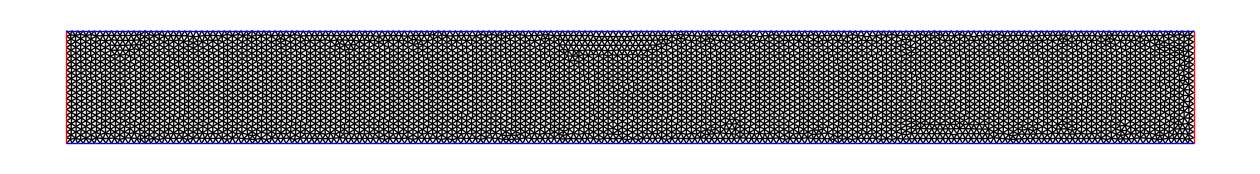

In [8]:
waveguide.plot()

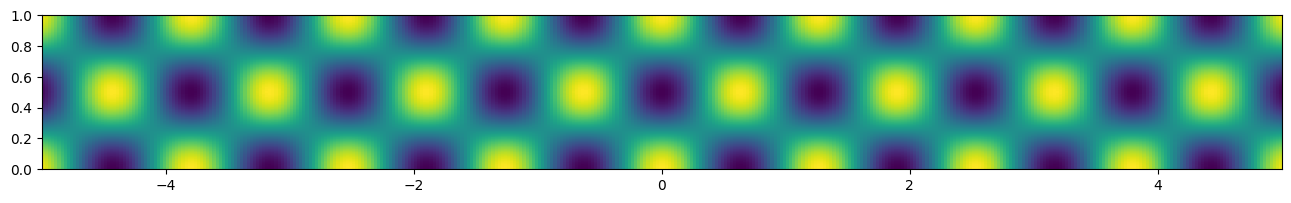

In [4]:
k = 8
waveguide.plot_field(Mode(n=2, k=k), real_part=True, N=400)

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 60%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.000507055s, CPU 0.000635s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.000849073s, CPU 0.00104s)
Info    : 26 nodes 54 elements


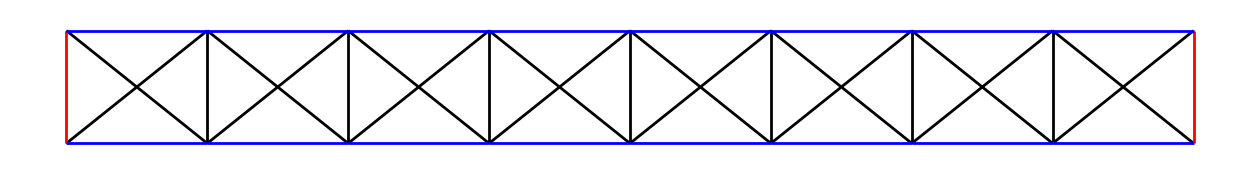

In [13]:
waveguide = Waveguide(lc=1.41, verbose=True)
waveguide.plot(line_width=2)

In [14]:
waveguide.domain.ready_for_assemble

False

In [15]:
waveguide.domain.edges["region"]

array([ 2,  1, -1,  2,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1, -1], dtype=int8)

In [16]:
regions = waveguide._regions

In [17]:
bcs = { regions.GAMMA: 1, regions.SIGMA: 2}
waveguide.set_boundary_conditions(bcs)

Problem ready for assembly


In [7]:
waveguide.domain.edges["flux_type"]


array([2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [8]:
waveguide.domain.ready_for_assemble

True

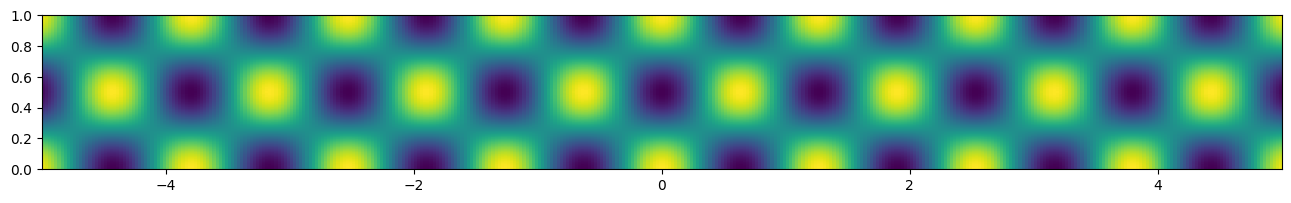

In [9]:
k = 8
waveguide.plot_field(Mode(n=2, k=k), real_part=True, N=400)

In [10]:
u = ComplexFunction(waveguide.domain, 3, k)

In [11]:
u.set(np.tile([0,1,1], waveguide.domain.n_triangles))

(-5.0, 5.0)

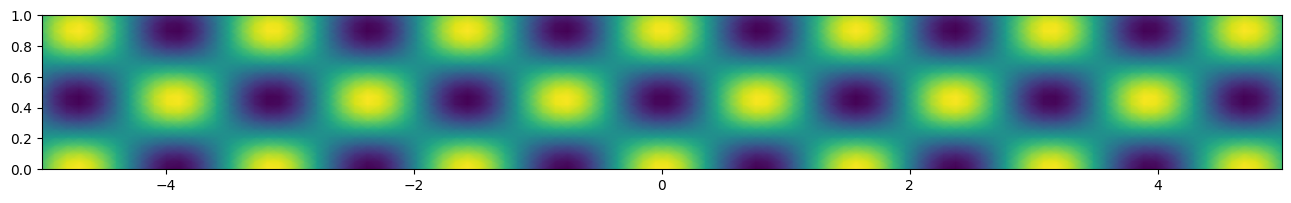

In [12]:
x = np.linspace(-5,5,100)
y = np.linspace(0,1,20)
X, Y = np.meshgrid(x, y)
Z = u(X.flatten(), Y.flatten()).reshape(X.shape)
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(16,2))
ax.pcolormesh(X,Y,np.real(Z), shading="gouraud")
ax.set_ylim([0,1])
ax.set_xlim([-5,5])
